# 1015 MiniProject
## Group 4
### Members:
     Aloysisus Ng
     Ling Hin
     Ng I-Shen Samuel
     Wilson Lim Weijun
Dataset: In Hospital Mortality Prediction

In [23]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import sys
!{sys.executable} -m pip install missingpy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [24]:
medicaldata = pd.read_csv('mortalityprediction/data01.csv')
medicaldata.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
0                   0               0         1                  1   
1                   0               0         0                  1   
2                   0               0         0                  1   
3                   0               0         0                  0   
4                   0               0         0                  1   

   depression  Hyperlipemia  Renal failure  COPD  heart rate  \
0           0             1              1     0   68.837838   
1           0             0              0     1  101.370370   
2           0             0              1     0   72.318182   
3           0             0              0     0   94.500000   
4           0             0              1     1   67.920000   

   Systolic blood pressure  Diastolic blood pressure  Respiratory rate  \
0               155.866667                 68.333333         16.621622   
1               140.000000                 65.000000         20.851852   
2               135.333333                 61.375000         23.640000   
3               126.400000                 73.200000         21.857143   
4               156.560000                 58.120000         21.360000   

   temperature      SP O2  Urine output  hematocrit       RBC        MCH  \
0    36.714286  98.394737        2155.0   26.272727  2.960000  28.250000   
1    36.682540  96.923077        1425.0   30.780000  3.138000  31.060000   
2    36.453704  95.291667        2425.0   27.700000  2.620000  34.320000   
3    36.287037  93.846154        8760.0   36.637500  4.277500  26.062500   
4    36.761905  99.280000        4455.0   29.933333  3.286667  30.666667   

        MCHC      MCV        RDW  Leucocyte  Platelets  Neutrophils  \
0  31.520000   89.900  16.220000   7.650000    305.100        74.65   
1  31.660000   98.200  14.260000  12.740000    246.400          NaN   
2  31.300000  109.800  23.820000   5.480000    204.200        68.10   
3  30.412500   85.625  17.037500   8.225000    216.375        81.80   
4  33.666667   91.000  16.266667   8.833333    251.000          NaN   

   Basophils  Lymphocyte         PT       INR  NT-proBNP  Creatine kinase  \
0       0.40        13.3  10.600000  1.000000     1956.0       148.000000   
1        NaN         NaN        NaN       NaN     2384.0        60.600000   
2       0.55        24.5  11.275000  0.950000     4081.0        16.000000   
3       0.15        14.5  27.066667  2.666667      668.0        85.000000   
4        NaN         NaN        NaN       NaN    30802.0       111.666667   

   Creatinine  Urea nitrogen     glucose  Blood potassium  Blood sodium  \
0    1.958333      50.000000  114.636364         4.816667    138.750000   
1    1.122222      20.333333  147.500000         4.450000    138.888889   
2    1.871429      33.857143  149.000000         5.825000    140.714286   
3    0.585714      15.285714  128.250000         4.386667    138.500000   
4    1.950000      43.000000  145.750000         4.783333    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  

In [25]:
medicaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

## Abbreviation meaning
    BMI                       Body Mass index 
    CHD with no MI            Coronary heart disease with no heart attack 
    COPD                      chronic inflammatory lung disease  
    SP O2                     Blood oxygen level
    RBC                       Red Blood Cell
    MCH                       Mean corpuscular hemoglobin
    MCHC                      Mean corpuscular hemoglobin concentration
    MCV                       Mean corpuscular volume
    RDW                       Red cell distribution width
    PT                        Prothrombin time
    INR                       International normalized ratio
    NT-proBNP                 NT-proB-type Natriuretic Peptide
    PH                        potential hydrogen
    PCO2                      partial pressure of carbon dioxide 
    EF                        Ejection fraction  

In [26]:
IndependentVariables = ["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]
DependentVariables = ["hypertensive","atrialfibrillation","CHD with no MI","diabetes","deficiencyanemias","depression","Hyperlipemia","Renal failure","COPD"]

## MissForest

In [27]:
#missforest to fill in NA values
cols = medicaldata.columns.tolist()
kimputer2 = Pipeline([("imputer", MissForest()),
                   ("pandarizer", FunctionTransformer(lambda x: pd.DataFrame(x, columns = cols)))])
medicaldata = kimputer2.fit_transform(medicaldata)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
medicaldata

Iteration: 0
Iteration: 1
Iteration: 2


group        ID  outcome   age  gendera         BMI  hypertensive  \
0       1.0  125047.0      0.0  72.0      1.0   37.588179           0.0   
1       1.0  139812.0      0.0  75.0      2.0   32.316393           0.0   
2       1.0  109787.0      0.0  83.0      2.0   26.572634           0.0   
3       1.0  130587.0      0.0  43.0      2.0   83.264629           0.0   
4       1.0  138290.0      0.0  75.0      2.0   31.824842           1.0   
5       1.0  154653.0      0.0  76.0      1.0   24.262293           1.0   
6       1.0  194420.0      0.0  72.0      1.0   39.667426           1.0   
7       1.0  153461.0      0.0  83.0      2.0   22.311111           1.0   
8       1.0  113076.0      0.0  61.0      2.0   19.992243           1.0   
9       1.0  147252.0      0.0  67.0      1.0   45.032030           1.0   
10      1.0  104216.0      0.0  70.0      2.0   50.461212           1.0   
11      1.0  135608.0      0.0  83.0      2.0   25.391896           1.0   
12      1.0  178662.0      0.0  77.0      2.0   22.698962           1.0   
13      1.0  178671.0      0.0  83.0      1.0   33.891057           1.0   
14      1.0  127360.0      0.0  69.0      2.0   20.000000           1.0   
15      1.0  103753.0      0.0  87.0      2.0   35.198942           1.0   
16      1.0  191838.0      1.0  83.0      2.0   27.180634           1.0   
17      1.0  141668.0      0.0  56.0      2.0   27.851618           1.0   
18      1.0  114085.0      0.0  45.0      2.0   91.176653           1.0   
19      1.0  185887.0      0.0  89.0      2.0   26.909064           0.0   
20      1.0  129574.0      0.0  62.0      1.0   28.099174           0.0   
21      1.0  182755.0      1.0  78.0      2.0   37.851434           1.0   
22      1.0  104305.0      0.0  86.0      2.0   30.577934           1.0   
23      1.0  105739.0      0.0  58.0      1.0   51.360148           1.0   
24      1.0  151335.0      0.0  64.0      2.0   76.530612           0.0   
25      1.0  160674.0      0.0  56.0      1.0   36.185734           0.0   
26      1.0  107427.0      0.0  85.0      1.0   29.513889           1.0   
27      1.0  171473.0      1.0  89.0      1.0   24.398532           1.0   
28      1.0  122249.0      0.0  66.0      2.0   46.507661           1.0   
29      1.0  186754.0      0.0  84.0      2.0   25.970916           1.0   
30      1.0  181582.0      0.0  89.0      2.0   27.243370           1.0   
31      1.0  110298.0      0.0  86.0      2.0   21.992188           1.0   
32      1.0  125422.0      0.0  89.0      2.0   25.889698           0.0   
33      1.0  146489.0      0.0  65.0      2.0   28.718113           0.0   
34      1.0  110692.0      0.0  79.0      2.0   34.193213           1.0   
35      1.0  143003.0      0.0  81.0      2.0   26.520488           1.0   
36      1.0  169810.0      0.0  88.0      2.0   24.756994           1.0   
37      1.0  133885.0      1.0  89.0      2.0   19.980509           1.0   
38      1.0  184760.0      0.0  76.0      1.0   26.974300           0.0   
39      1.0  131897.0      0.0  72.0      2.0   32.056516           0.0   
40      1.0  168911.0      1.0  81.0      1.0   30.584013           0.0   
41      1.0  167683.0      1.0  89.0      1.0   30.715368           1.0   
42      1.0  198451.0      0.0  69.0      1.0   19.777289           0.0   
43      1.0  191289.0      1.0  82.0      1.0   26.598738           1.0   
44      1.0  160318.0      0.0  61.0      2.0   53.633218           1.0   
45      1.0  146354.0      0.0  64.0      2.0   23.212846           1.0   
46      1.0  130036.0      0.0  64.0      2.0   36.537703           0.0   
47      1.0  164737.0      1.0  79.0      1.0   32.256614           0.0   
48      1.0  195979.0      0.0  76.0      1.0   34.835188           1.0   
49      1.0  143538.0      0.0  84.0      1.0   30.045914           1.0   
50      1.0  137876.0      1.0  80.0      2.0   25.631039           1.0   
51      1.0  171138.0      0.0  75.0      1.0   27.469273           0.0   
52      1.0  172547.0      0.0 

## Split Data into Train set and Test set

In [28]:
train, test = train_test_split(medicaldata, test_size=0.2,shuffle=True)

In [29]:
train.shape

(941, 51)

In [30]:
test.shape

(236, 51)

## EDA

### Count Plot

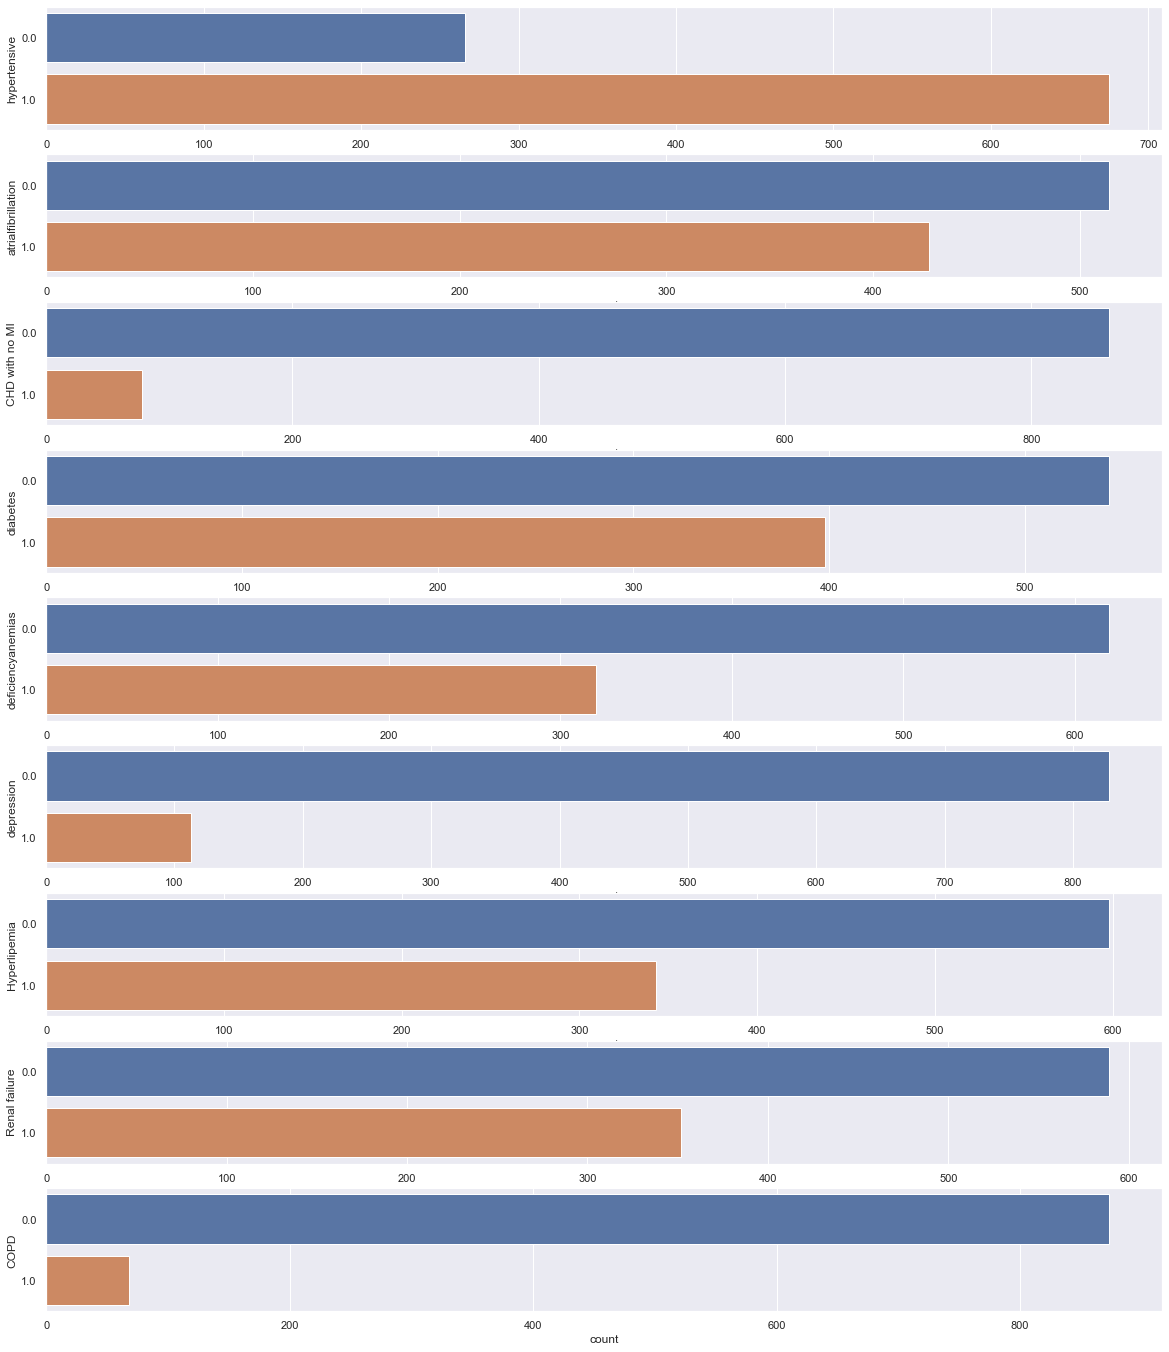

In [33]:
f, axes = plt.subplots(9, 1, figsize=(20, 24))


count = 0
for var in DependentVariables:
    sb.countplot(y=var, data = train, ax=axes[count])
    count += 1

Analysis:
Make sense for the values not to be equal the people in the data can have multiple diseases or none, and they did not  specifically chose people with certain diseases.
Some of the diseases still have significant amount of data for both the yes and no data

### Boxplot

In [189]:
def boxplotfunction(disease,independentvariable):
    f, axes = plt.subplots(38, 1, figsize=(20, 200))


    count = 0
    for var in independentvariable:
        sb.boxplot(x = var, y = disease, data = train, orient = "h", ax = axes[count]).set(title=var)
        count += 1

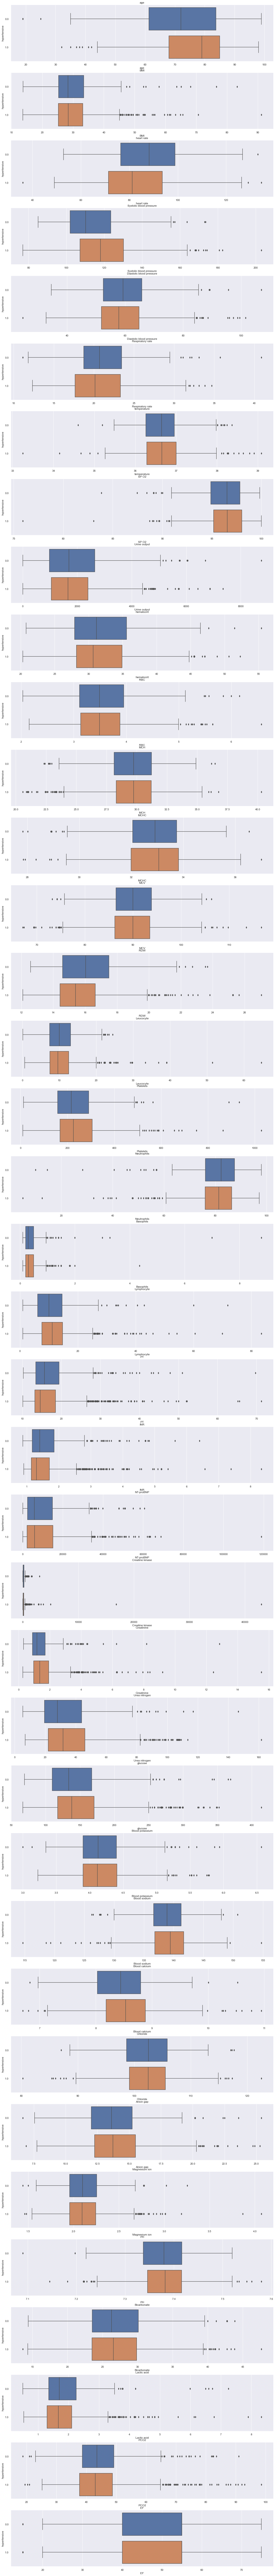

In [190]:
boxplotfunction("hypertensive", IndependentVariables)

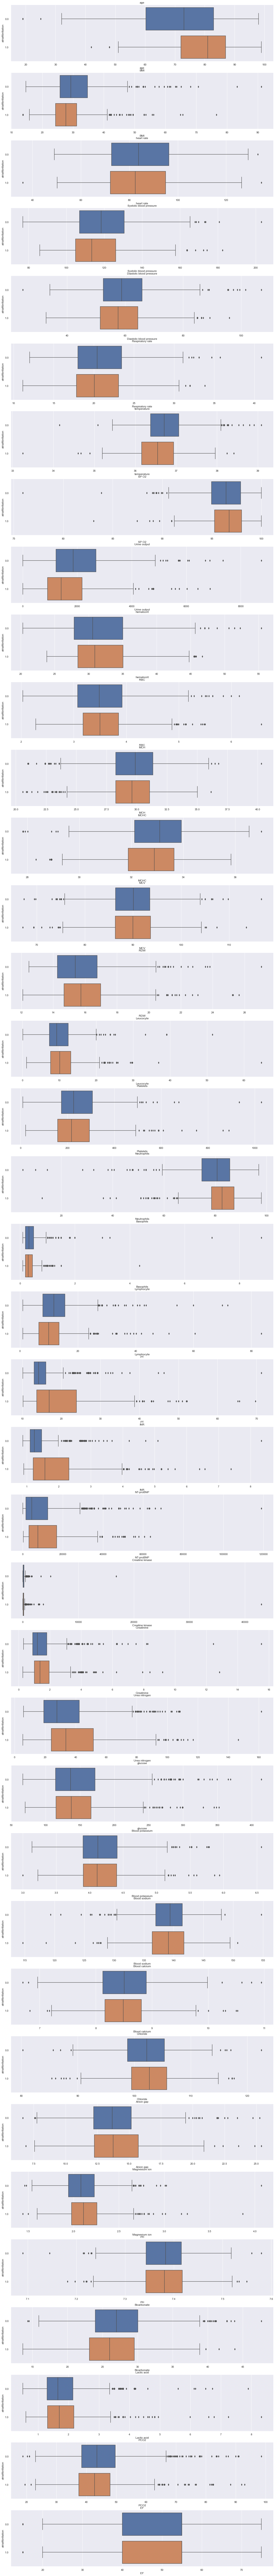

In [191]:
boxplotfunction("atrialfibrillation", IndependentVariables)

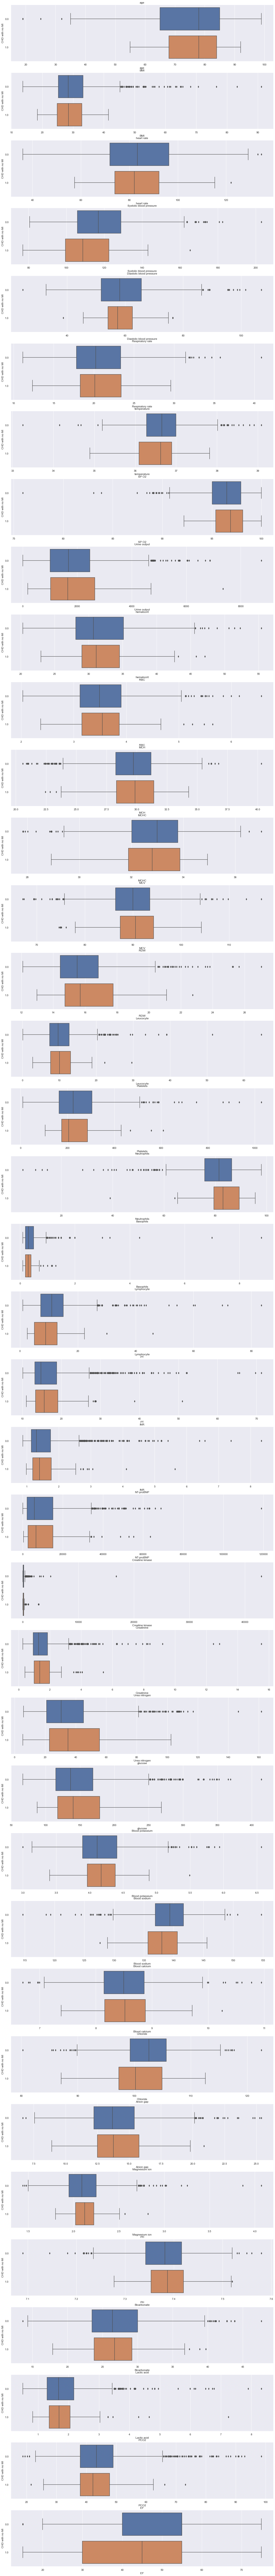

In [274]:
boxplotfunction("CHD with no MI", IndependentVariables)

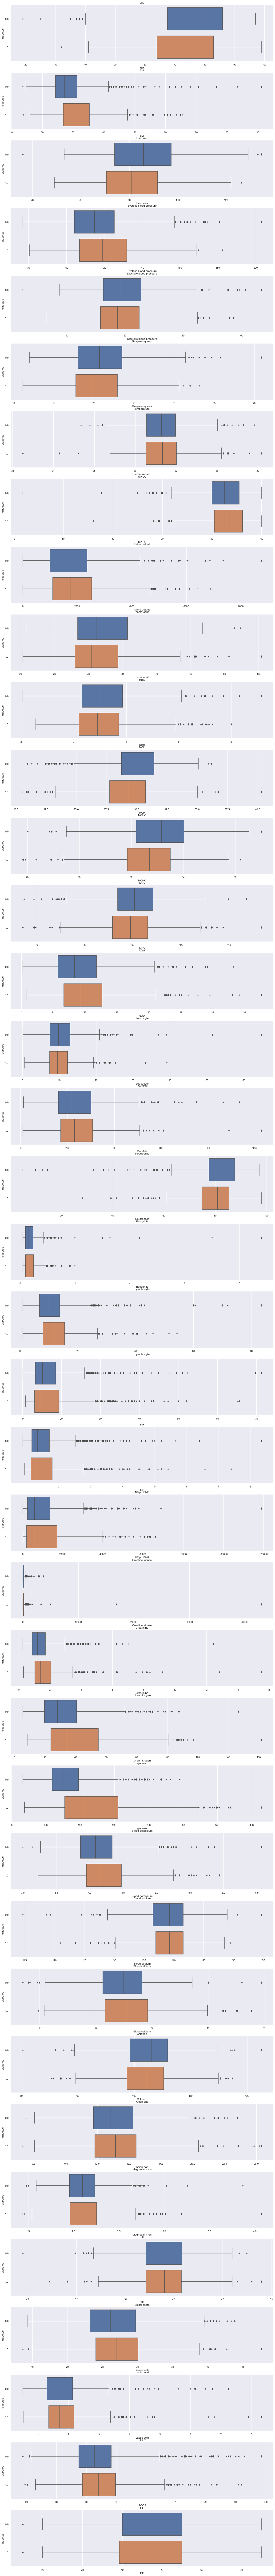

In [193]:
boxplotfunction("diabetes", IndependentVariables)

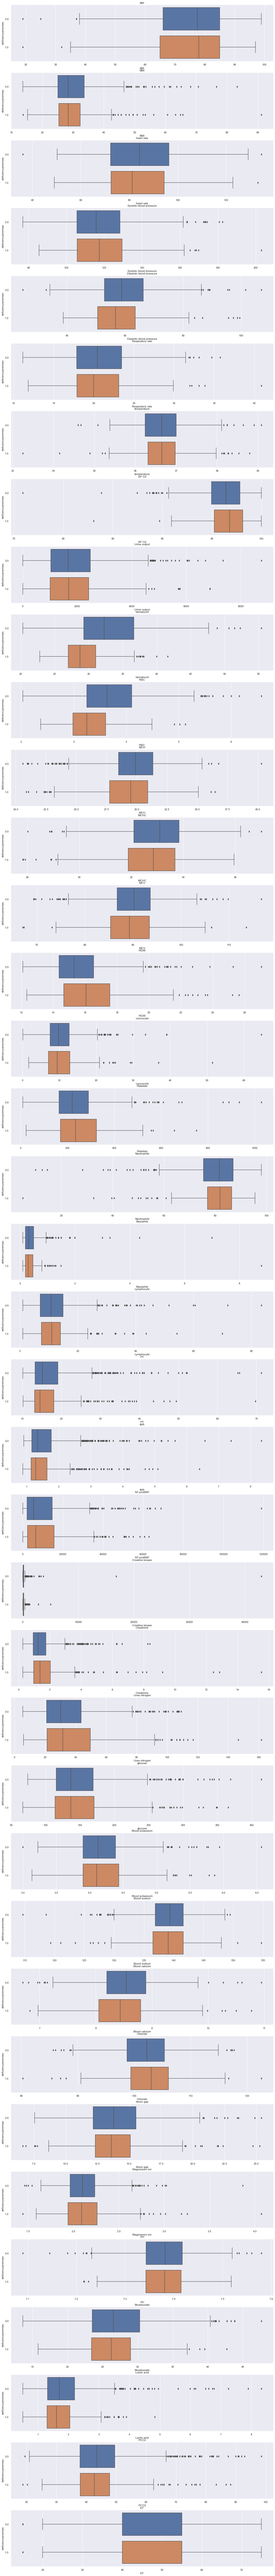

In [194]:
boxplotfunction("deficiencyanemias", IndependentVariables)

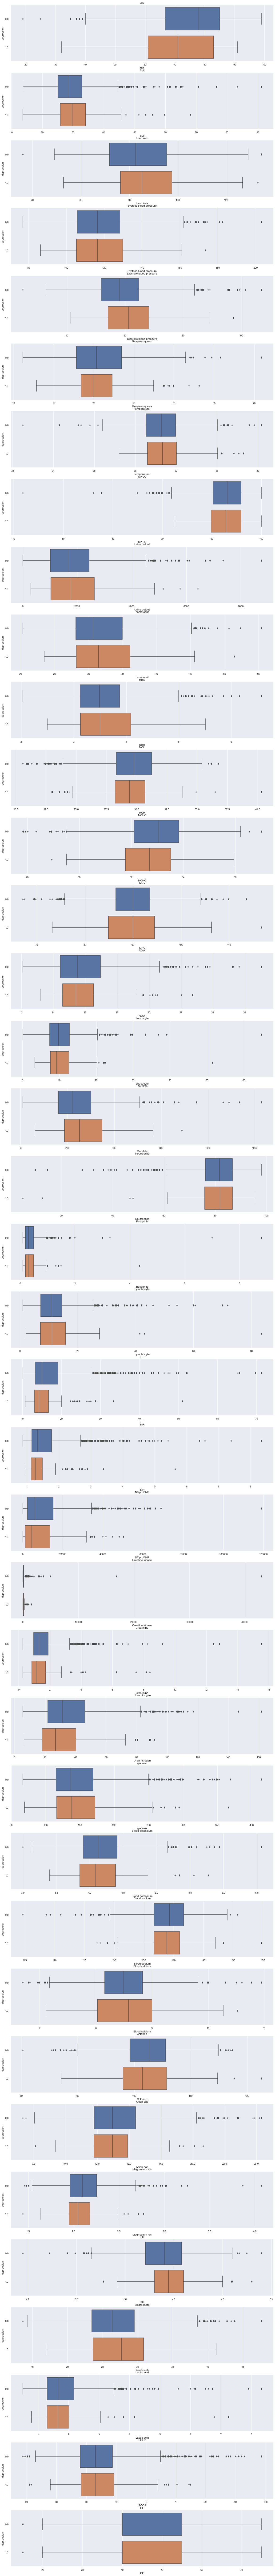

In [195]:
boxplotfunction("depression", IndependentVariables)

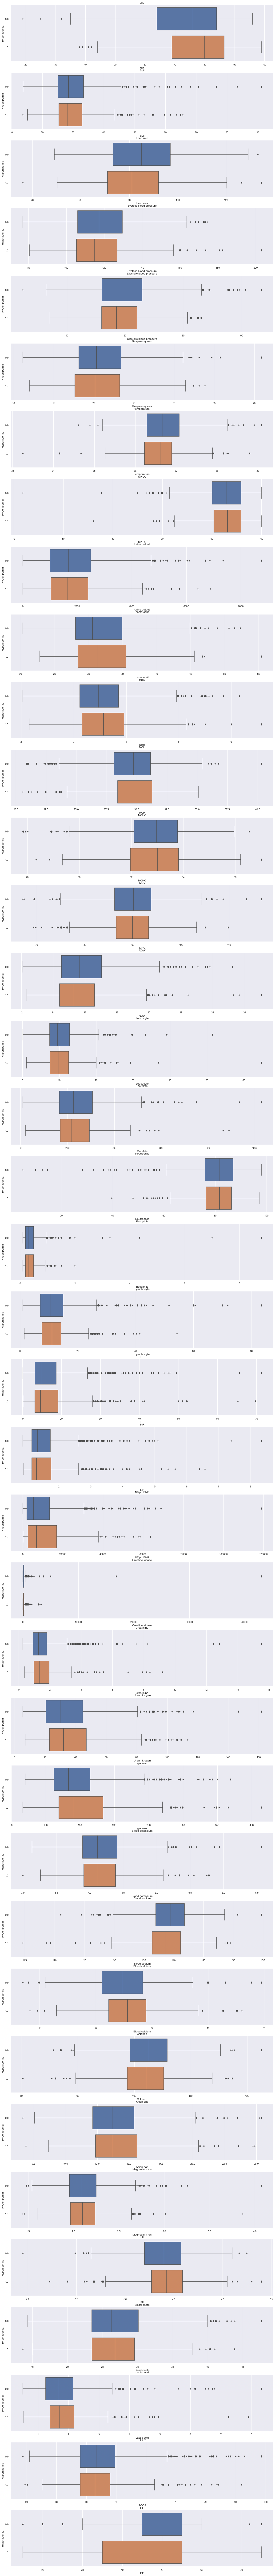

In [196]:
boxplotfunction("Hyperlipemia", IndependentVariables)

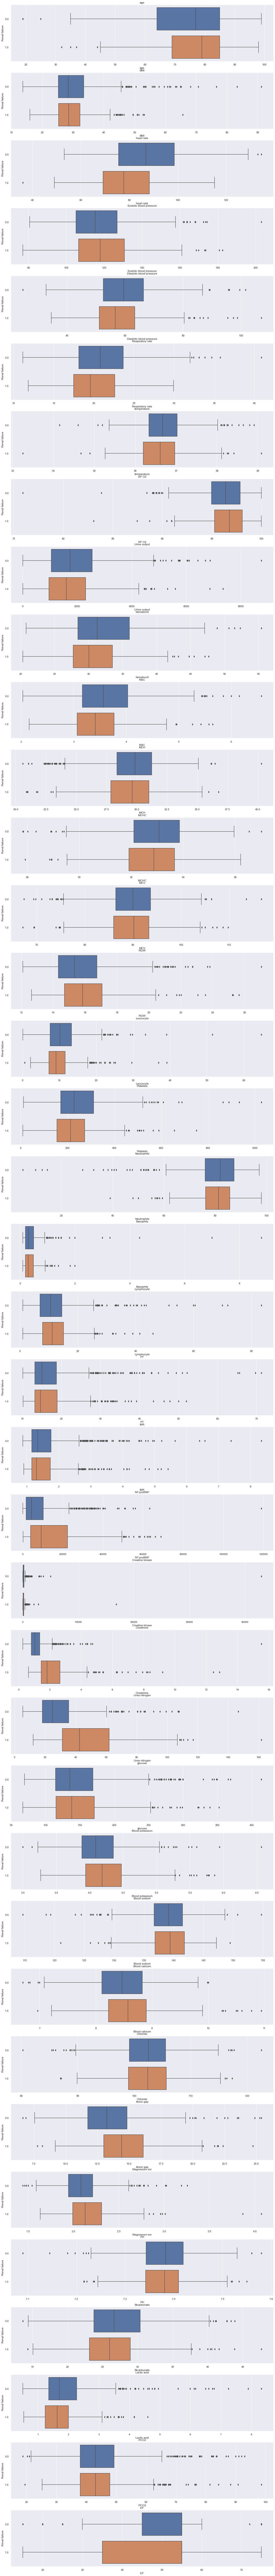

In [197]:
boxplotfunction("Renal failure", IndependentVariables)

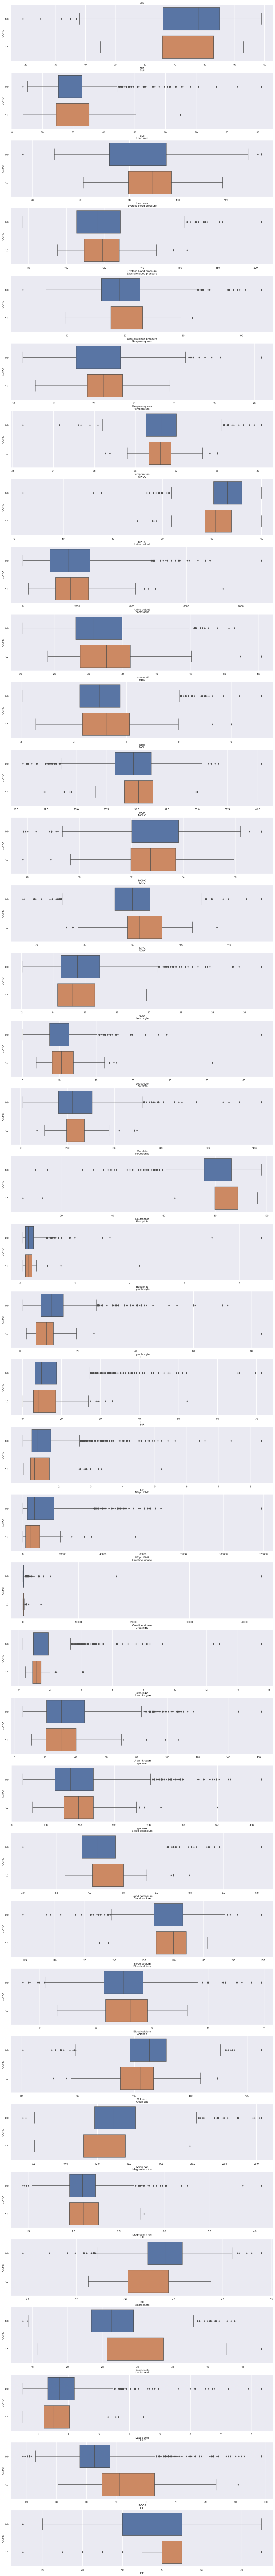

In [198]:
boxplotfunction("COPD", IndependentVariables)

Analysis:
All the variables are quite similar and does not have significant difference between whether or not if someone got the disease.
Boxplot not visually to see which variables play a significant factor in whether someone got the disease.
Hence maybe a heatmap showing, each variable correlation value can tell a clearer picture

### Heatmap

In [284]:
def heatmap(disease,count):
    y_train = train[disease]
    X_train = train.drop(columns = DependentVariables)
    #f = plt.figure(figsize=(4, 10))
    trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)
    king=abs(trainDF.corr())
    sb.heatmap(king[[disease]], vmin = 0, vmax = 1, annot = True, cmap="YlOrBr", fmt = ".2f",ax=axes[count])

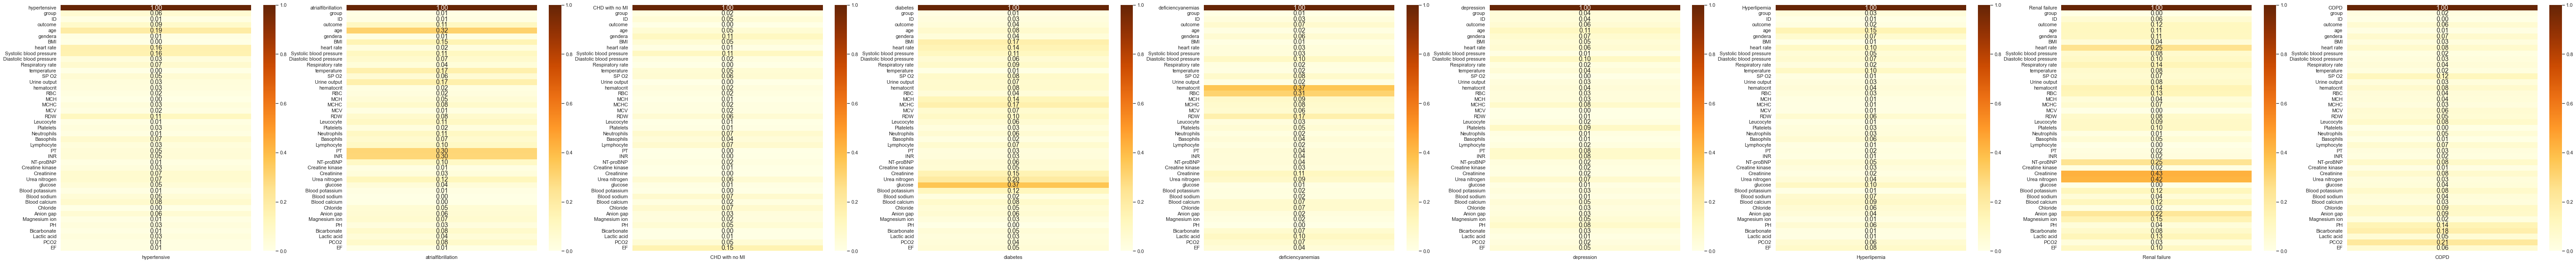

In [285]:
f, axes = plt.subplots(1, 9, figsize=(100, 10))

count = 0
for var in DependentVariables:
    heatmap(var,count)
    count += 1

Analysis:
    
    Able to see which variables have a more significant impact on the diseases.
    Most of the variables have have small correlation values of almost 0.
    Some diseases have a few variables with correlation values more than 0.3.
    However, variables with correlation values ~0.3 is not very strong and too few of them to single them out for machine
    learning.
    Renal Failure do have 2 variables(Creatine and Glucose with correlation value of >0.4)
    Hence, we decide to use all the available variables for machine learning.
    Since we have so many variables, a random forest would be a good model to see if these variables can determine whether 
    or not someone would have any of these 9 diseases with data of these variables

## Machine Learning

In [205]:
#split the data from our train and test data set to the x and y values for machine learning
X_train = train[IndependentVariables]
y_train1 = train['hypertensive']
y_train2 = train['atrialfibrillation']
y_train3 = train['CHD with no MI']
y_train4 = train['diabetes']
y_train5 = train['deficiencyanemias']
y_train6 = train['depression']
y_train7 = train['Hyperlipemia']
y_train8 = train['Renal failure']
y_train9 = train['COPD']
X_test = test[IndependentVariables]
y_test1 = test['hypertensive']
y_test2 = test['atrialfibrillation']
y_test3 = test['CHD with no MI']
y_test4 = test['diabetes']
y_test5 = test['deficiencyanemias']
y_test6 = test['depression']
y_test7 = test['Hyperlipemia']
y_test8 = test['Renal failure']
y_test9 = test['COPD']

### Random Forest
    We use GridSearch before RandomForest to find the best parameters for the RandomForest model so that we do not need to try
    different parameters multiple times

In [219]:
def RandomForestLin(X_train, X_test,y_train, y_test):
    
    
    
    param_grid = {'n_estimators': np.arange(100,1001,100),  
                  'max_depth': np.arange(2, 11)}             

   
    hpGrid = GridSearchCV(RandomForestClassifier(),  
                          param_grid,                 
                          cv = 5,                     
                          scoring = 'accuracy')       
   
    hpGrid.fit(X_train, y_train.ravel())
    
   
    print(hpGrid.best_estimator_)

   
    print(np.abs(hpGrid.best_score_))
    
    bestdic = hpGrid.best_params_
    a= bestdic['max_depth']
    b= bestdic['n_estimators']
    
   
    rforest = RandomForestClassifier(n_estimators = b,  
                                 max_depth = a)       

    
    rforest.fit(X_train, y_train)
    
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)

    
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(X_train, y_train))
    print()

    
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(X_test, y_test))
    print()

    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        
    cm = confusion_matrix(y_train,y_train_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTrain = TP/(FN+TP)
    FalsePositiveRateTrain = FP/(TN+FP)
    FalseNegativeRateTrain = FN/(FN+TP)
    TrueNegativeRateTrain = TN/(TN+FP)

    cm = confusion_matrix(y_test,y_test_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTest = TP/(FN+TP)
    FalsePositiveRateTest = FP/(TN+FP)
    FalseNegativeRateTest = FN/(FN+TP)
    TrueNegativeRateTest = TN/(TN+FP)

    print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
    print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
    print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
    print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
    print()

    print("TruePositiveRateTest \t:", TruePositiveRateTest)
    print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
    print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
    print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
    print()

### RandomForest for hypertensive

RandomForestClassifier(max_depth=6)
0.7311381290104694
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8150903294367694

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7245762711864406

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.6541353383458647
TrueNegativeRateTrain 	: 0.3458646616541353
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.9941176470588236
FalsePositiveRateTest 	: 0.9696969696969697
TrueNegativeRateTest 	: 0.030303030303030304
FalseNegativeRateTest 	: 0.0058823529411764705



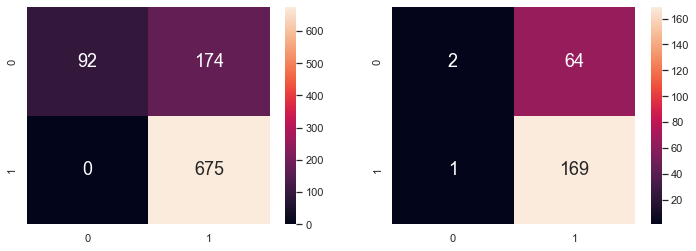

In [220]:
RandomForestLin(X_train, X_test,y_train1, y_test1)

Analysis for hypertensive RandomForest:
    
    Classification Accuracy are pretty decent and True Positive Rate are high too.
    However, False Positive Rate are also very high.

### RandomForest for atrialfibrillation

RandomForestClassifier(max_depth=8, n_estimators=400)
0.723758865248227
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9574920297555791

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6822033898305084

TruePositiveRateTrain 	: 0.9203747072599532
FalsePositiveRateTrain 	: 0.011673151750972763
TrueNegativeRateTrain 	: 0.9883268482490273
FalseNegativeRateTrain 	: 0.07962529274004684

TruePositiveRateTest 	: 0.49038461538461536
FalsePositiveRateTest 	: 0.16666666666666666
TrueNegativeRateTest 	: 0.8333333333333334
FalseNegativeRateTest 	: 0.5096153846153846



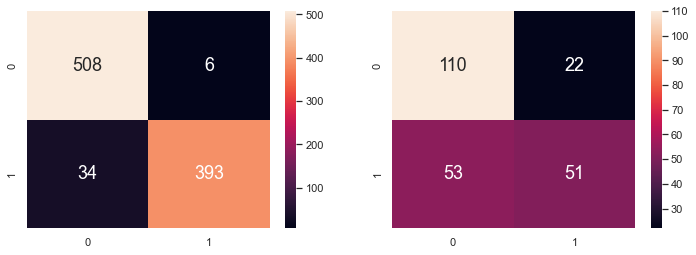

In [221]:
RandomForestLin(X_train, X_test,y_train2, y_test2)

Analysis for atrialfibrillation:
    
    Train Data set results look good
    Classification Accuracy of test data set is a bit low, True Positive value of test data set<0.5 even though True Negative 
    Rate is high

### RandomForest for CHD with no MI

RandomForestClassifier(max_depth=2)
0.9171113362602725
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9171094580233794

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.902542372881356

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



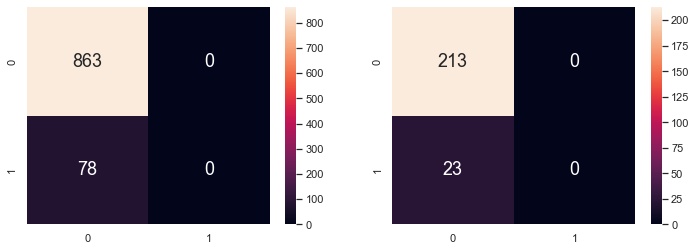

In [222]:
RandomForestLin(X_train, X_test,y_train3, y_test3)

Analsis on Random Forest for CHD with no MI
    
    Classification Accuracy are very high for both train and test data, however all the results predictable are Negative
    This could be due to the imbalance in the Positive and Negative data from the data set
    Resampling is needed 

### RandomForest for diabetes

RandomForestClassifier(max_depth=9, n_estimators=600)
0.7289935832489023
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9957492029755579

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.711864406779661

TruePositiveRateTrain 	: 0.9899497487437185
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.010050251256281407

TruePositiveRateTest 	: 0.5102040816326531
FalsePositiveRateTest 	: 0.14492753623188406
TrueNegativeRateTest 	: 0.855072463768116
FalseNegativeRateTest 	: 0.4897959183673469



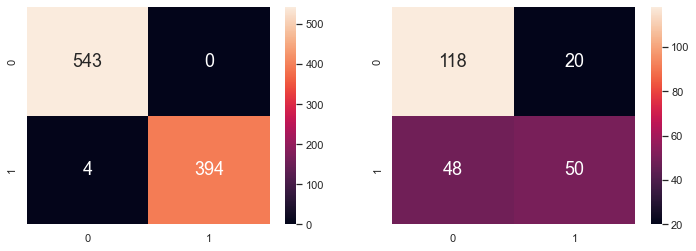

In [223]:
RandomForestLin(X_train, X_test,y_train4, y_test4)

Analysis on Random Forest for diabetes
    
    Very good results from the train data set, however false positive rate for the test data set is a little high

### RandomForest for deficiencyanemias

RandomForestClassifier(max_depth=10)
0.7013565236969492
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9946865037194474

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7203389830508474

TruePositiveRateTrain 	: 0.9844236760124611
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.01557632398753894

TruePositiveRateTest 	: 0.358974358974359
FalsePositiveRateTest 	: 0.10126582278481013
TrueNegativeRateTest 	: 0.8987341772151899
FalseNegativeRateTest 	: 0.6410256410256411



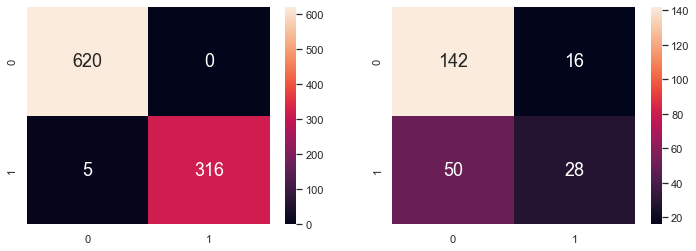

In [224]:
RandomForestLin(X_train, X_test,y_train5, y_test5)

Analsysis of Random Forest for deficiencyanemias:
    
    Again, results for the train data set is pretty good but false negative rate is high for the test set

## RandomForest for depression

RandomForestClassifier(max_depth=2)
0.8799166948103118
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8799149840595112

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.885593220338983

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



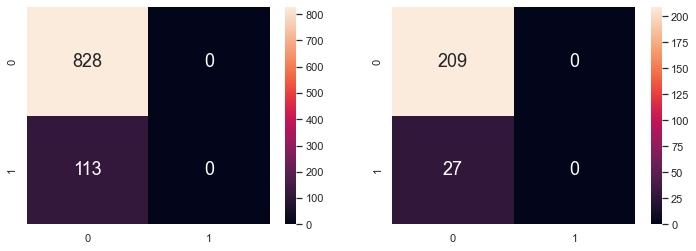

In [225]:
RandomForestLin(X_train, X_test,y_train6, y_test6)

Analsis on Random Forest for depression
    
    All the results predictable are negative.
    RandomForest not a good model to predict depression.
    Maybe depression does not have much correlation to these variables of the physical body or because of the unbalanced 
    data set like CHD with no MI's results

## RandomForest for Hyperlipemia

RandomForestClassifier(max_depth=8)
0.6375942812113025
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9638682252922423

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5550847457627118

TruePositiveRateTrain 	: 0.9008746355685131
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.09912536443148688

TruePositiveRateTest 	: 0.0673076923076923
FalsePositiveRateTest 	: 0.06060606060606061
TrueNegativeRateTest 	: 0.9393939393939394
FalseNegativeRateTest 	: 0.9326923076923077



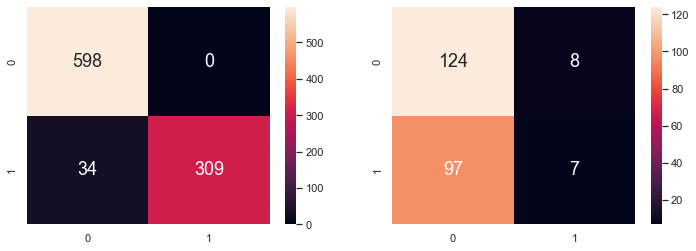

In [226]:
RandomForestLin(X_train, X_test,y_train7, y_test7)

Analysis of RandomForest for Hyperlipemia:

    Test data set have a very inaccurate result for Hyperlipemia since the False Negative Rate is very high

## RandomForest for Renal failure

RandomForestClassifier(max_depth=10, n_estimators=300)
0.8076438140267926
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.997874601487779

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7923728813559322

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.003395585738539898
TrueNegativeRateTrain 	: 0.9966044142614601
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.7435897435897436
FalsePositiveRateTest 	: 0.18354430379746836
TrueNegativeRateTest 	: 0.8164556962025317
FalseNegativeRateTest 	: 0.2564102564102564



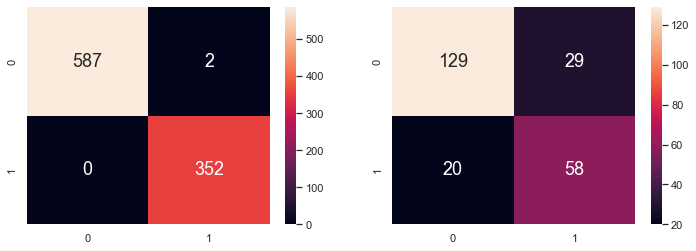

In [227]:
RandomForestLin(X_train, X_test,y_train8, y_test8)

Analysis of RandomForest for Renal failure:
    
        Train set results are very good.
        Test set results are also pretty good since both True Positive Rate and True Negative Rate are more than 0.7
        Renal failure do have a pretty good correlation with all these variables

## RandomForest for COPD

RandomForestClassifier(max_depth=2)
0.927738376674547
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9277364505844846

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9110169491525424

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



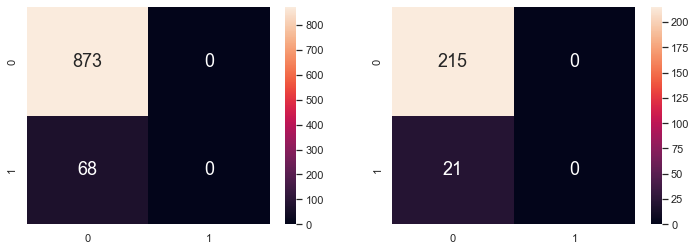

In [228]:
RandomForestLin(X_train, X_test,y_train9, y_test9)

Analysis of RandomForest for COPD:

    Not a good model for COPD as False Negative Rate is very high for the test data set, similar to CHD with no MI, it could be
    because of the very unbalanced data set

# Resample

We decided to resample CHD with no MI to balance the yes and no data to see if it gives a more accurate model

In [229]:
medicalCHD0 = train[train["CHD with no MI"] == 0]
medicalCHD1 = train[train["CHD with no MI"] == 1]
 

medicalCHD1_up = resample(medicalCHD1,replace=True,n_samples=medicalCHD0.shape[0])    
 

medicalCHD_up = pd.concat([medicalCHD0, medicalCHD1_up])
 

medicalCHD_up["CHD with no MI"].value_counts()

0.0    863
1.0    863
Name: CHD with no MI, dtype: int64

In [230]:
medicalCHD_up.shape

(1726, 51)

In [247]:
y_trainCHDup = medicalCHD_up["CHD with no MI"]
X_trainCHDup = pd.DataFrame(medicalCHD_up[["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]])

RandomForestClassifier(max_depth=10, n_estimators=300)
0.98898885817207
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9942062572421785

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8728813559322034

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.011587485515643106
TrueNegativeRateTrain 	: 0.9884125144843569
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.08695652173913043
FalsePositiveRateTest 	: 0.04225352112676056
TrueNegativeRateTest 	: 0.9577464788732394
FalseNegativeRateTest 	: 0.9130434782608695



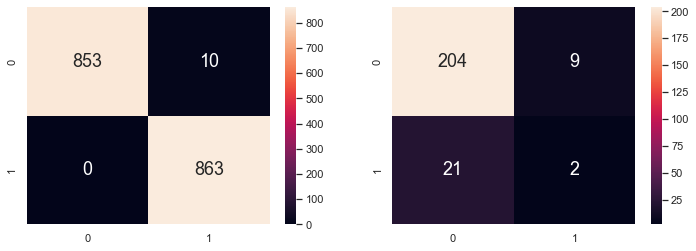

In [237]:
RandomForestLin(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:
    
    Better results than before resampling but True Negative Rate is still pretty high
    Maybe because the test data set is also imbalanced

## We try other machine learning model to check if result becomes better

### Logistic Regression

In [238]:
def Logitech(X_train, X_test,y_train, y_test):
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train,y_train.values.ravel())
    
    y_train_pred=logreg.predict(X_train)
    y_test_pred=logreg.predict(X_test)


    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", logreg.score(X_train, y_train))
    print()


    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", logreg.score(X_test, y_test))
    print()


    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    cm = confusion_matrix(y_train,y_train_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTrain = TP/(FN+TP)
    FalsePositiveRateTrain = FP/(TN+FP)
    FalseNegativeRateTrain = FN/(FN+TP)
    TrueNegativeRateTrain = TN/(TN+FP)

    cm = confusion_matrix(y_test,y_test_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTest = TP/(FN+TP)
    FalsePositiveRateTest = FP/(TN+FP)
    FalseNegativeRateTest = FN/(FN+TP)
    TrueNegativeRateTest = TN/(TN+FP)

    print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
    print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
    print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
    print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
    print()

    print("TruePositiveRateTest \t:", TruePositiveRateTest)
    print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
    print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
    print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
    print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6703360370799536

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6186440677966102

TruePositiveRateTrain 	: 0.6674391657010429
FalsePositiveRateTrain 	: 0.3267670915411356
TrueNegativeRateTrain 	: 0.6732329084588644
FalseNegativeRateTrain 	: 0.3325608342989571

TruePositiveRateTest 	: 0.4782608695652174
FalsePositiveRateTest 	: 0.36619718309859156
TrueNegativeRateTest 	: 0.6338028169014085
FalseNegativeRateTest 	: 0.5217391304347826



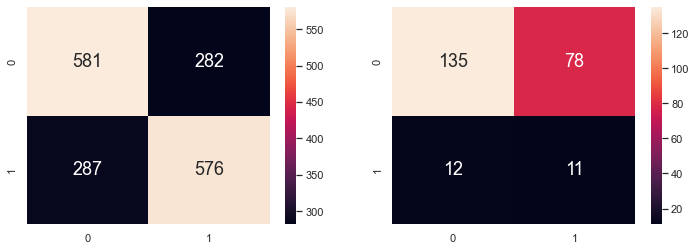

In [240]:
Logitech(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:

    Logistic Regression produce a much better result than randomforest for CHD with no MI

### Decision Tree

In [241]:
def DecisionTreeEpic(X_train, X_test,y_train, y_test):
        param_dict = {"max_depth":np.arange(2,11)}
        hpGrid = GridSearchCV(DecisionTreeClassifier(),  
                          param_dict,                 
                          cv = 5,                     
                          scoring = 'accuracy')   
        hpGrid.fit(X_train, y_train.ravel())
        bestdic = hpGrid.best_params_
        a= bestdic['max_depth']

        dectree = DecisionTreeClassifier(max_depth = 10)
        dectree.fit(X_train, y_train)
        f = plt.figure(figsize=(48,48))
        plot_tree(dectree, filled=True, rounded=True, 
                  feature_names=X_train.columns, 
                  class_names=["No","Yes"])
 
        y_train_pred = dectree.predict(X_train)
        y_test_pred = dectree.predict(X_test)

        
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Classification Accuracy \t:", dectree.score(X_train, y_train))
        print()


        print("Goodness of Fit of Model \tTest Dataset")
        print("Classification Accuracy \t:", dectree.score(X_test, y_test))
        print()


        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sb.heatmap(confusion_matrix(y_train, y_train_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
        cm = confusion_matrix(y_train,y_train_pred)
        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]

        ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
        TruePositiveRateTrain = TP/(FN+TP)
        FalsePositiveRateTrain = FP/(TN+FP)
        FalseNegativeRateTrain = FN/(FN+TP)
        TrueNegativeRateTrain = TN/(TN+FP)

        cm = confusion_matrix(y_test,y_test_pred)
        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]

        ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
        TruePositiveRateTest = TP/(FN+TP)
        FalsePositiveRateTest = FP/(TN+FP)
        FalseNegativeRateTest = FN/(FN+TP)
        TrueNegativeRateTest = TN/(TN+FP)

        print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
        print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
        print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
        print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
        print()

        print("TruePositiveRateTest \t:", TruePositiveRateTest)
        print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
        print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
        print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
        print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9159907300115875

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6949152542372882

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.16801853997682503
TrueNegativeRateTrain 	: 0.831981460023175
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.2608695652173913
FalsePositiveRateTest 	: 0.25821596244131456
TrueNegativeRateTest 	: 0.7417840375586855
FalseNegativeRateTest 	: 0.7391304347826086



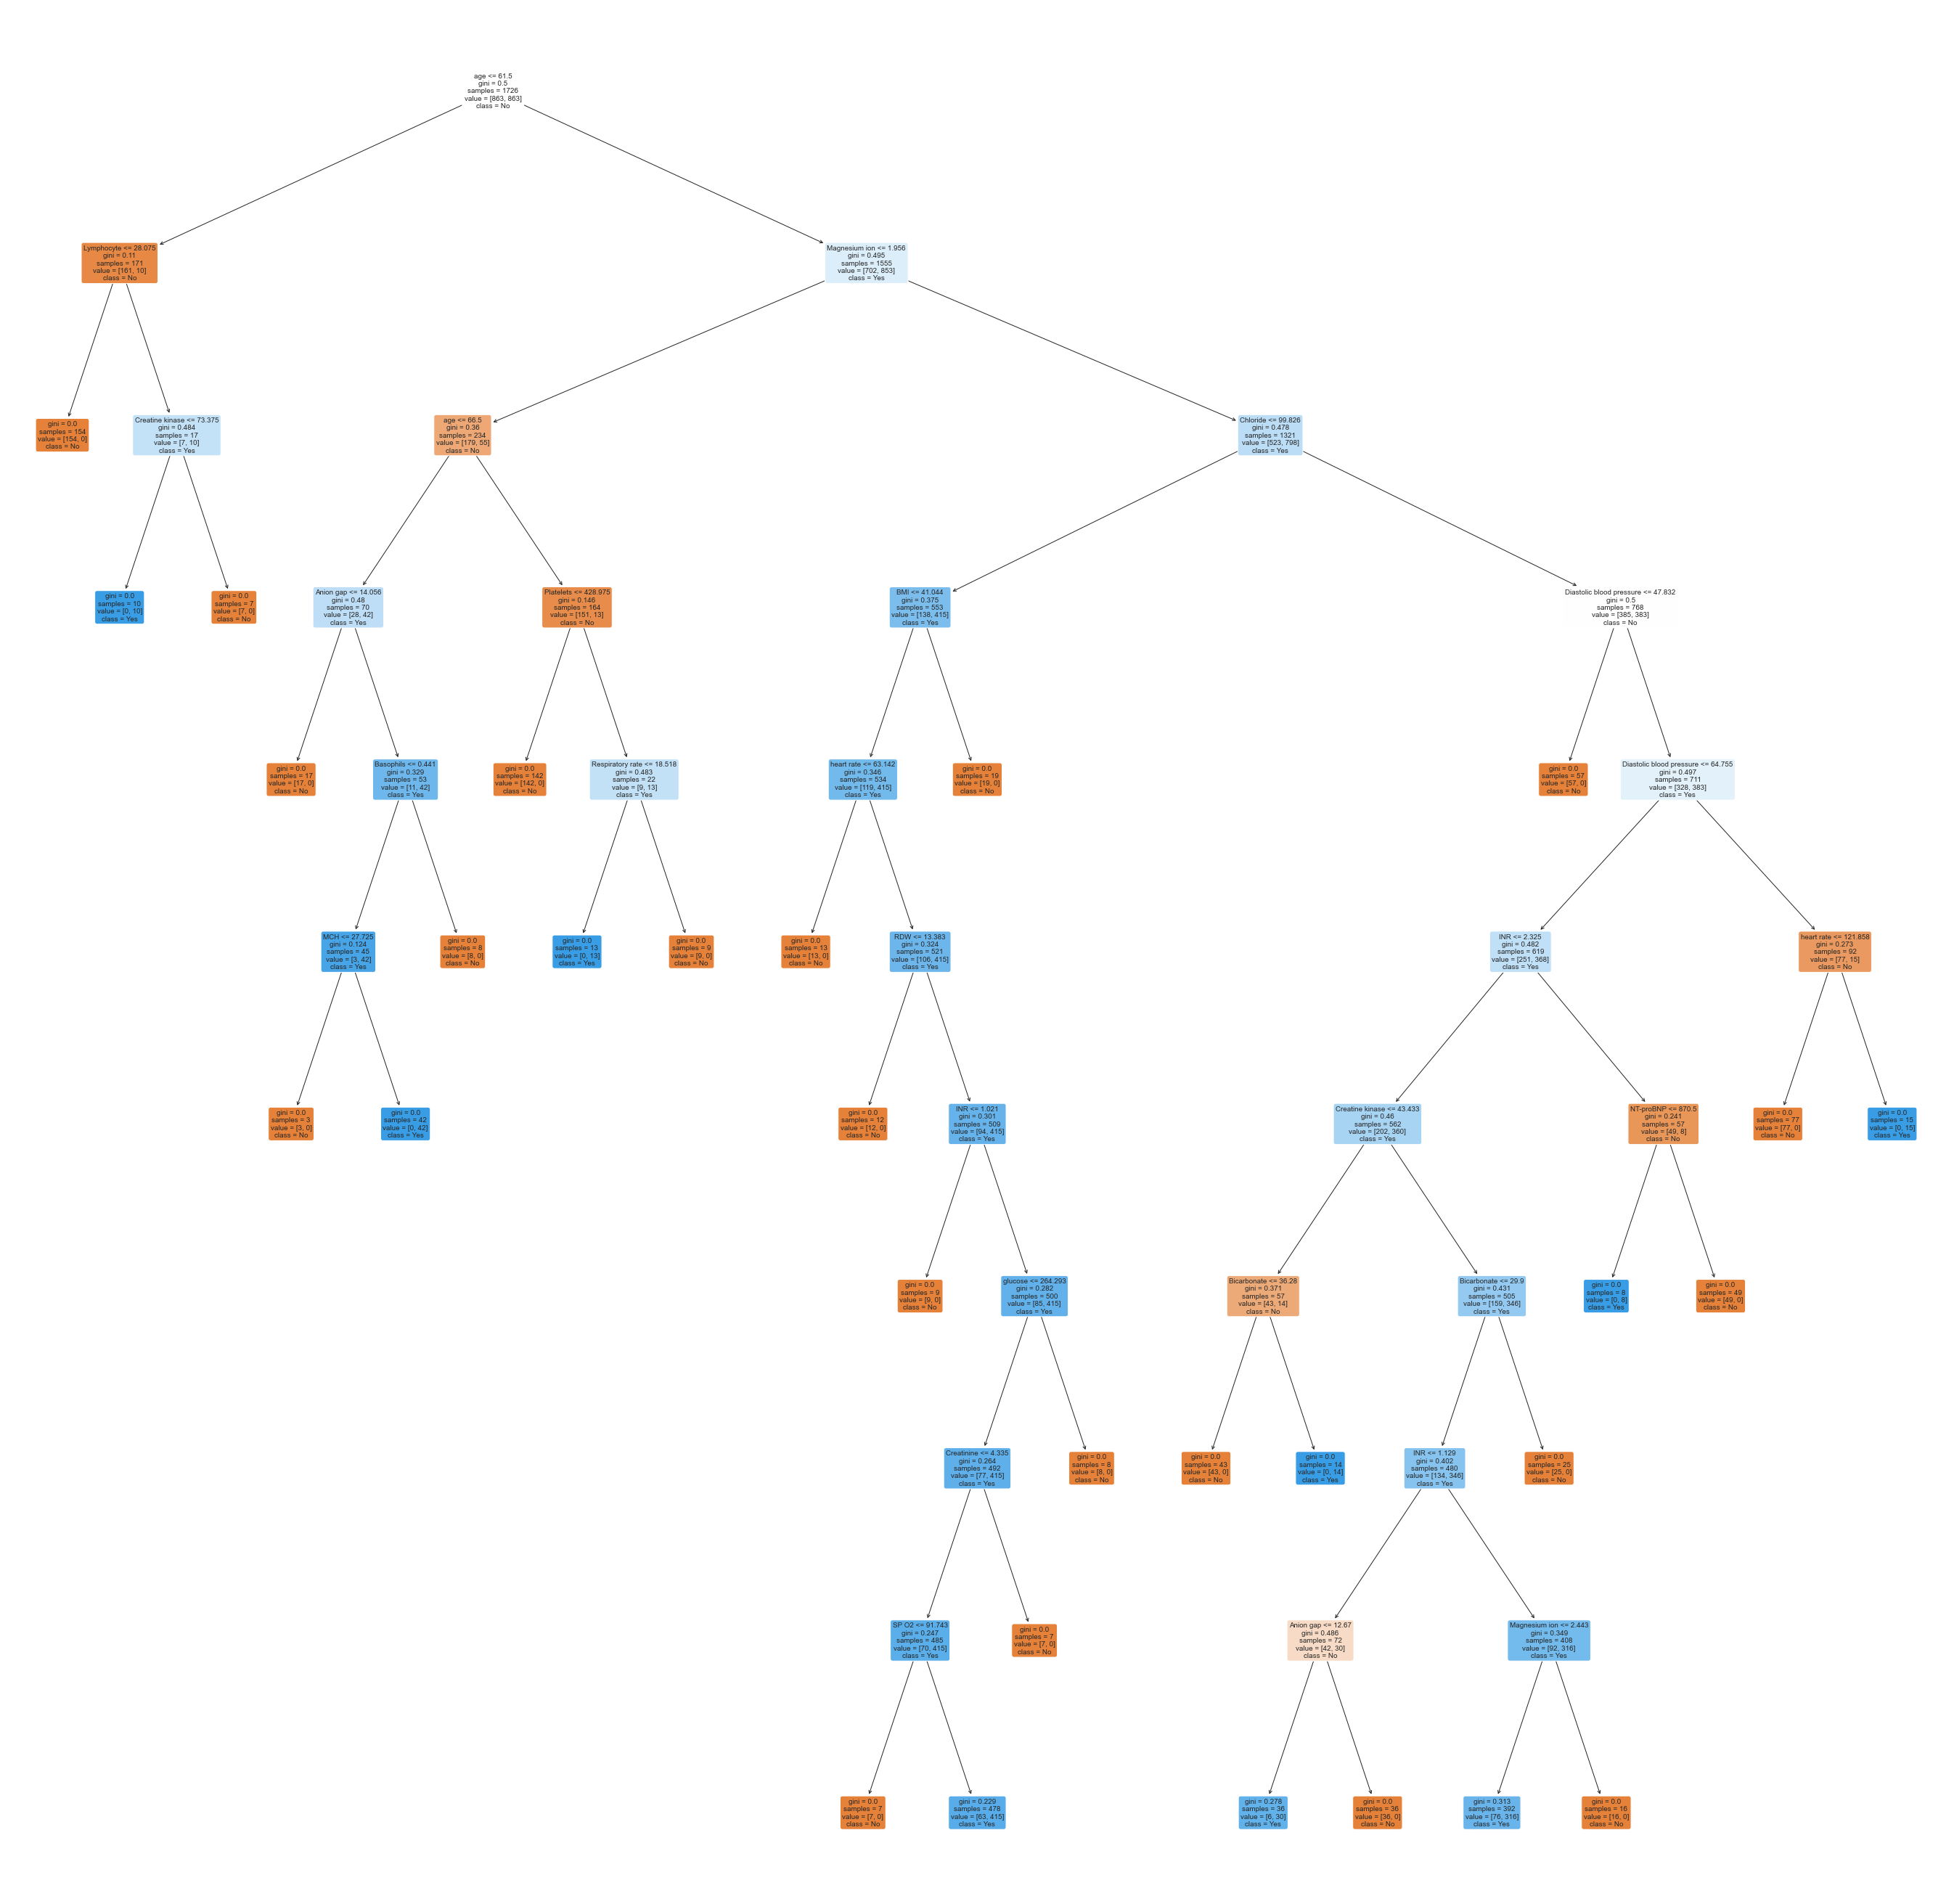

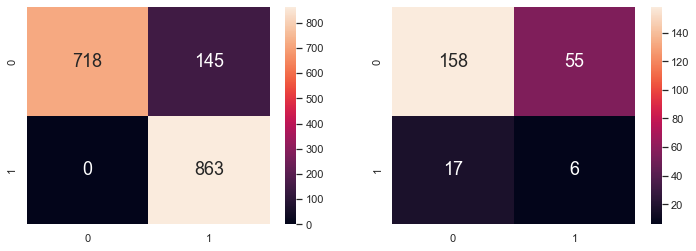

In [242]:
DecisionTreeEpic(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:

    Slightly better results than RandomForest, maybe because RandomForest with GridSearch overfit a little.
    However, it still loses to Logistic Regression Model

## Feature importances
    We use feature importance to see which variables are more important in determing the diseases in the Logistic Regression 
    Model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Logistic Regression Feature Importance')

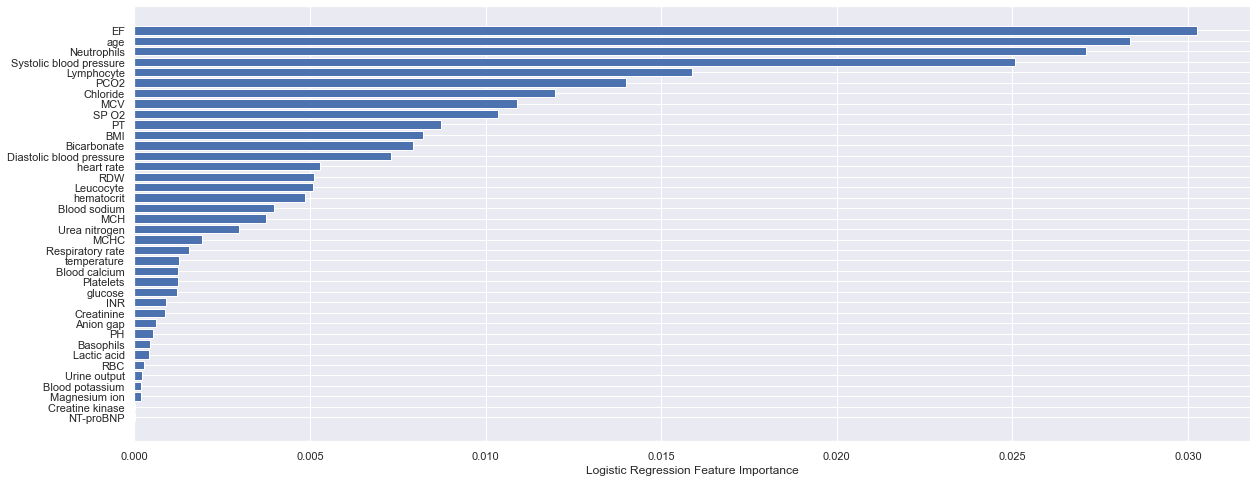

In [286]:
plt.rcParams.update({'figure.figsize': (20.0, 8.0)})
plt.rcParams.update({'font.size': 14})
model = LogisticRegression()
model.fit(X_trainCHDup, y_trainCHDup)
importance = abs(model.coef_[0])
#absolute value to better see the scale of the correlation values
sorted_idx = importance.argsort()
plt.barh(X_trainCHDup.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Logistic Regression Feature Importance")

Analysis:

    Top 5 variables are:
        EF,age,Neutrophilis,Systolic blood pressure and Lymphocyte

## Resample Renal failure data and check if it produces better results

In [251]:
medicalRenal0 = train[train["Renal failure"] == 0]
medicalRenal1 = train[train["Renal failure"] == 1]
 

medicalRenal1_up = resample(medicalRenal1, 
                        replace=True,                     
                        n_samples=medicalRenal0.shape[0])   
 

medicalRenal_up = pd.concat([medicalRenal0, medicalRenal1_up])
 

medicalRenal_up["Renal failure"].value_counts()

0.0    589
1.0    589
Name: Renal failure, dtype: int64

In [252]:
medicalRenal_up.shape

(1178, 51)

In [253]:
y_trainRenalup = medicalRenal_up["Renal failure"]
X_trainRenalup = pd.DataFrame(medicalRenal_up[["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]])

### RandomForest

RandomForestClassifier(max_depth=10, n_estimators=600)
0.8862206996033176
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9864176570458404

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7838983050847458

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.027164685908319185
TrueNegativeRateTrain 	: 0.9728353140916808
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.7692307692307693
FalsePositiveRateTest 	: 0.2088607594936709
TrueNegativeRateTest 	: 0.7911392405063291
FalseNegativeRateTest 	: 0.23076923076923078



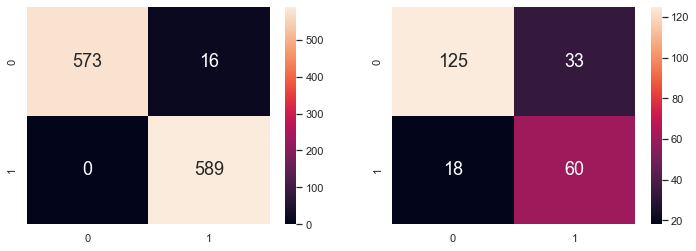

In [254]:
RandomForestLin(X_trainRenalup, X_test,y_trainRenalup, y_test8)

### Logistic Regression

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7818336162988115

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7415254237288136

TruePositiveRateTrain 	: 0.7419354838709677
FalsePositiveRateTrain 	: 0.17826825127334464
TrueNegativeRateTrain 	: 0.8217317487266553
FalseNegativeRateTrain 	: 0.25806451612903225

TruePositiveRateTest 	: 0.8076923076923077
FalsePositiveRateTest 	: 0.2911392405063291
TrueNegativeRateTest 	: 0.7088607594936709
FalseNegativeRateTest 	: 0.19230769230769232



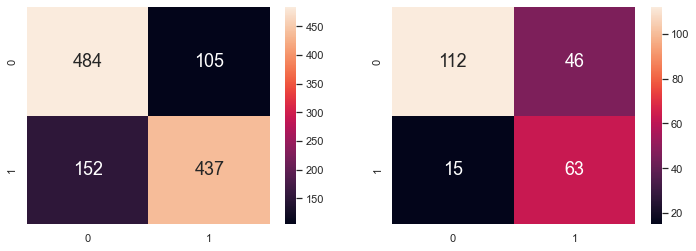

In [255]:
Logitech(X_trainRenalup, X_test,y_trainRenalup, y_test8)

### Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9473684210526315

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6822033898305084

TruePositiveRateTrain 	: 0.9932088285229203
FalsePositiveRateTrain 	: 0.09847198641765705
TrueNegativeRateTrain 	: 0.9015280135823429
FalseNegativeRateTrain 	: 0.006791171477079796

TruePositiveRateTest 	: 0.6153846153846154
FalsePositiveRateTest 	: 0.2848101265822785
TrueNegativeRateTest 	: 0.7151898734177216
FalseNegativeRateTest 	: 0.38461538461538464



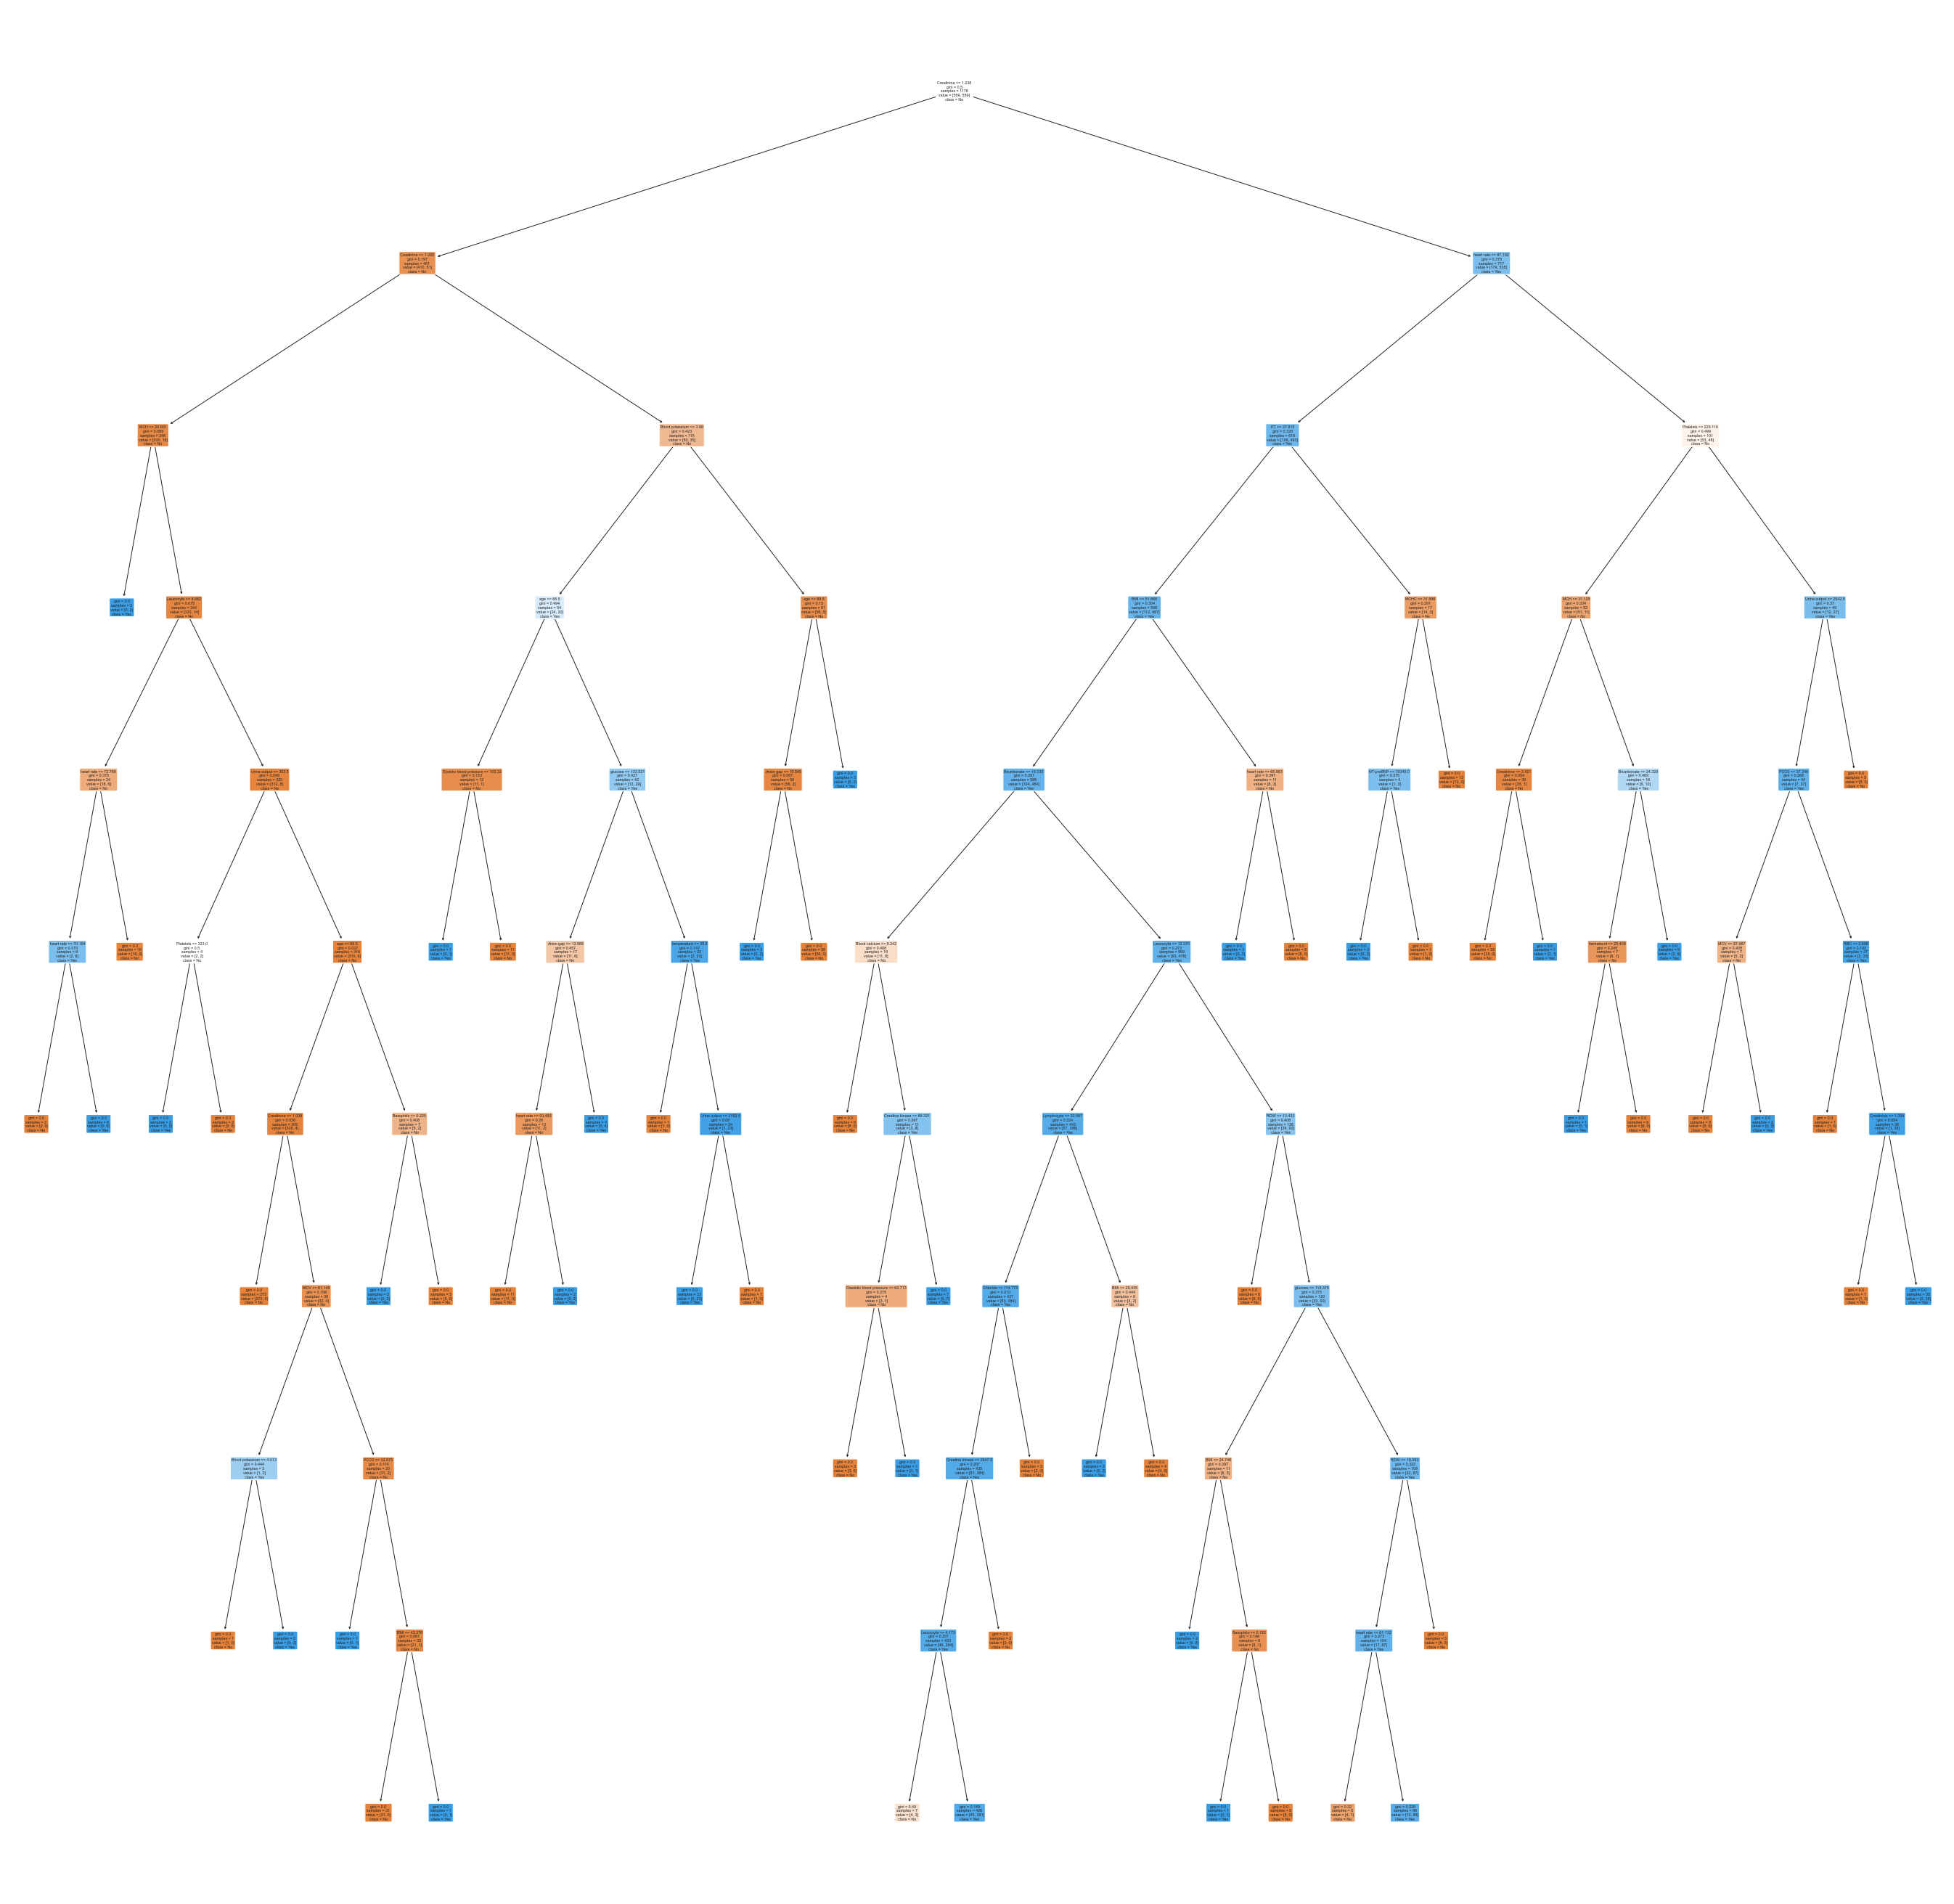

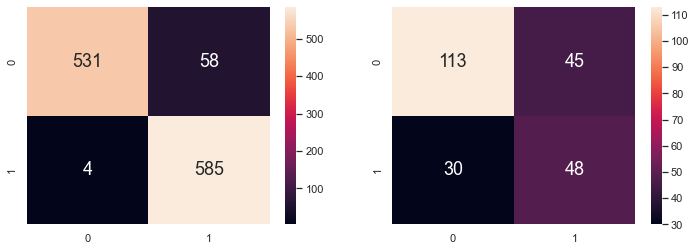

In [256]:
DecisionTreeEpic(X_trainRenalup, X_test,y_trainRenalup, y_test8)

Analysis:
    
    It turns out for Renal failure, RandomForest is still the most accurate machine learning model to predict the disease from
    the variables
    Resampling does not really improve the model as the results remains similar

## Feature importances
    We use feature importance to see which variables are more important in determing the diseases in the RandomForest Model

Text(0.5, 0, 'Random Forest Feature Importance')

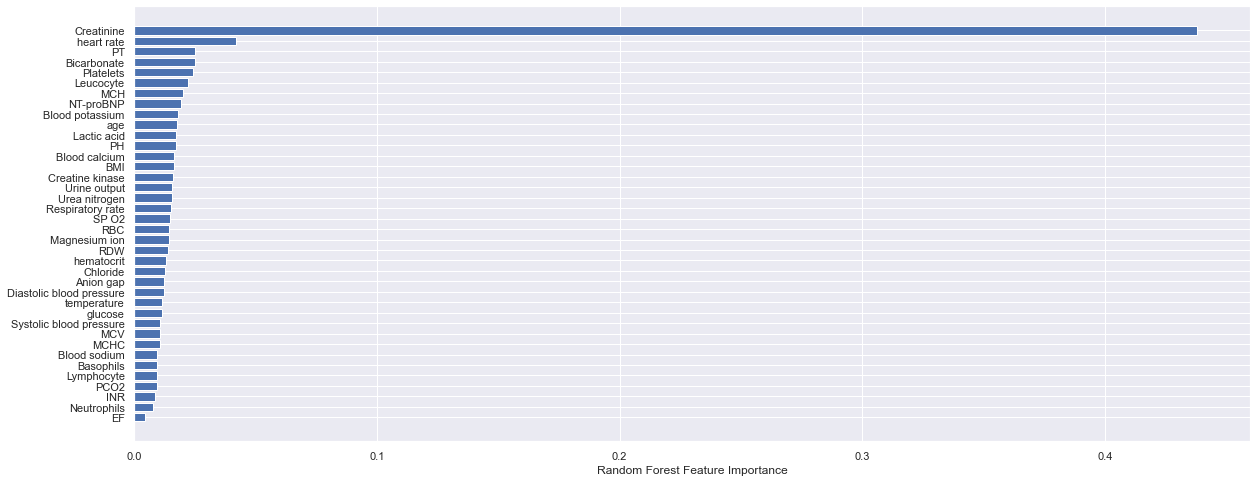

In [257]:
plt.rcParams.update({'figure.figsize': (20.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_trainRenalup, y_trainRenalup)
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_trainRenalup.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Analysis:
    
    Turns out Creatine is the most important factor in deciding whether someone got Renal faliure and is follow by variables
    such as heart rate, PT, Bicarbonate and Platelets

## RandomForest with top 5 variables for Renal and CHD

In [306]:
X_trainR5 = train[["Creatine kinase","Urea nitrogen","NT-proBNP","Anion gap","heart rate"]]
X_testR5 = test[["Creatine kinase","Urea nitrogen","NT-proBNP","Anion gap","heart rate"]]

RandomForestClassifier(max_depth=6, n_estimators=200)
0.7364235055724417
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8363443145589798

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7203389830508474

TruePositiveRateTrain 	: 0.7528409090909091
FalsePositiveRateTrain 	: 0.11375212224108659
TrueNegativeRateTrain 	: 0.8862478777589134
FalseNegativeRateTrain 	: 0.2471590909090909

TruePositiveRateTest 	: 0.6153846153846154
FalsePositiveRateTest 	: 0.22784810126582278
TrueNegativeRateTest 	: 0.7721518987341772
FalseNegativeRateTest 	: 0.38461538461538464



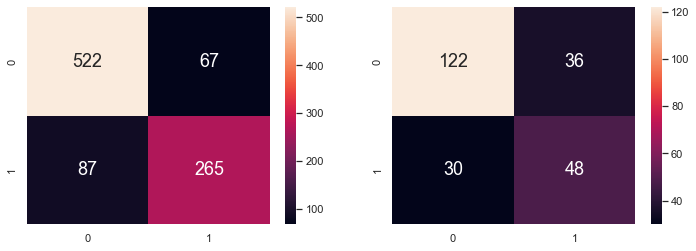

In [308]:
RandomForestLin(X_trainR5, X_testR5,y_train8, y_test8)

In [312]:
X_trainC5 = train[["EF", "gendera", "Systolic blood pressure", "Blood sodium", "Neutrophils"]]
X_testC5 = test[["EF", "gendera", "Systolic blood pressure", "Blood sodium", "Neutrophils"]]

RandomForestClassifier(max_depth=2)
0.9171113362602725
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9171094580233794

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.902542372881356

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



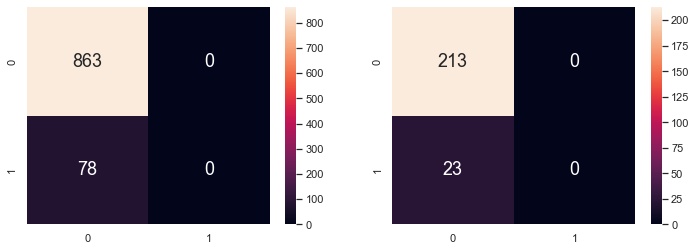

In [313]:
RandomForestLin(X_trainC5, X_testC5,y_train3, y_test3)